In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [2]:
import os
current_directory = os.getcwd()
files = os.listdir(current_directory)
for file in files:
    print(file)


Report3_apothuri.docx
Report2_apothuri.pdf
Report3_apothuri.pdf
README.md
Report1_apothuri.docx
Report1_apothuri.pdf
Internship_Project_Proposal_Akhilesh.pdf
Report2_apothuri.docx
.ipynb_checkpoints
.git
EDA_Draft 1.ipynb
Internship_Project_Proposal_Akhilesh.docx
FirstTrimesterCCData.csv


In [3]:
raw_df = pd.read_csv("FirstTrimesterCCData.csv")

In [4]:
raw_df.head()

,#,Name,Play Number,QB Comment,Series,Field Position,Down,Distance,Gain,OFF Group,...,pff_QBSCRAMBLE,pff_RBALIGNMENT,pff_RBDEPTH,pff_RBDIRECTION,pff_RBSINBACKFIELD,pff_RUNCONCEPTPRIMARY,pff_RUNCONCEPTSECONDARY,pff_SACK,pff_TEALIGNMENT,pff_PLAYCLOCK
0,71.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 001",1.0,NaN,1.0,-25.0,0.0,10.0,4.0,NaN,...,NaN,HB-L,HB-L (-5),R,1; NCCR 13 (HB-L),COUNTER,QB RUNS,NaN,L,11.0
1,72.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 002",2.0,NaN,1.0,-29.0,2.0,6.0,6.0,NaN,...,NaN,HB,HB (-7),L,1; NCCR 01 (HB),COUNTER,CROSS LEAD,NaN,L;R;R;R,4.0
2,73.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 003",3.0,NaN,1.0,-35.0,1.0,10.0,9.0,NaN,...,NaN,HB-R; FB-L,HB-R (-5); FB-L (-4),L,2; NCCR 00 (HB-R); NCCR 35 (FB-L),POWER,INVERTED;READ OPTION,NaN,L,1.0
3,74.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 004",4.0,NaN,1.0,-44.0,2.0,1.0,8.0,NaN,...,NaN,HB-R,HB-R (-6),R,1; NCCR 00 (HB-R),MAN,LEAD;QB RUNS,NaN,R;R,7.0
4,75.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 005",5.0,NaN,1.0,48.0,1.0,10.0,48.0,NaN,...,NaN,HB-R,HB-R (-5),NaN,1; NCCR 00 (HB-R),NaN,NaN,NaN,L,1.0


In [5]:
raw_df['QB Comment'].unique()

array([nan, '#35 BLOCK', '#86 HARD RUN', 'HELL YEAH', '#0 HARD RUN',
       '#19 BLOCK', '#52 MA. LOAD = SLIDE RT. QB PRESSURE',
       '#76 BAD SET = QB PRESSURE',
       '#76 PENALTY. TAKES AWAY 3RD DOWN CONVERSION'], dtype=object)

In [6]:
raw_df.columns

Index(['#', 'Name', 'Play Number', 'QB Comment', 'Series', 'Field Position',
       'Down', 'Distance', 'Gain', 'OFF Group', 'Personnel', 'The_Play',
       'Backfield', 'FIB', 'Formation', 'Form Adj Y', 'Form Adj WR',
       'Form Adj Bunch Stick', 'Empty', 'Motion', 'Motion 2', 'Motion 3',
       'Protection', 'Play', 'Tempo', 'Run Concept', 'Pass Concept',
       'Pass Concept 1', 'Pass Concept 2', 'Screen Concept', 'RPO1', 'ADDON 1',
       'R/P', 'Pass Result', 'MOE', 'QB#', 'J#', 'EFF', 'gamedate',
       'pff_GAMEDATE', 'pff_WEEK', 'pff_QUARTER', 'pff_DOWN', 'pff_CLOCK',
       'pff_2MINUTE', 'pff_DRIVESTARTEVENT', 'pff_DRIVEENDEVENT',
       'pff_DRIVESTARTFIELDPOSITION', 'pff_DRIVEENDFIELDPOSITION',
       'pff_FIELDPOSITION', 'pff_DRIVEENDPLAYNUMBER', 'pff_DRIVE',
       'pff_DRIVEPLAY', 'pff_GAINLOSS', 'pff_GAINLOSSNET', 'pff_DISTANCE',
       'pff_FIRST_DOWN_GAINED', 'pff_RUNPASS', 'pff_RUNPASSOPTION',
       'pff_PASSRESULT', 'pff_QB', 'pff_BALLCARRIER', 'pff_PENALTYYARDS'

In [7]:
display(raw_df)

,#,Name,Play Number,QB Comment,Series,Field Position,Down,Distance,Gain,OFF Group,...,pff_QBSCRAMBLE,pff_RBALIGNMENT,pff_RBDEPTH,pff_RBDIRECTION,pff_RBSINBACKFIELD,pff_RUNCONCEPTPRIMARY,pff_RUNCONCEPTSECONDARY,pff_SACK,pff_TEALIGNMENT,pff_PLAYCLOCK
0,71.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 001",1.0,NaN,1.0,-25.0,0.0,10.0,4.0,NaN,...,NaN,HB-L,HB-L (-5),R,1; NCCR 13 (HB-L),COUNTER,QB RUNS,NaN,L,11.0
1,72.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 002",2.0,NaN,1.0,-29.0,2.0,6.0,6.0,NaN,...,NaN,HB,HB (-7),L,1; NCCR 01 (HB),COUNTER,CROSS LEAD,NaN,L;R;R;R,4.0
2,73.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 003",3.0,NaN,1.0,-35.0,1.0,10.0,9.0,NaN,...,NaN,HB-R; FB-L,HB-R (-5); FB-L (-4),L,2; NCCR 00 (HB-R); NCCR 35 (FB-L),POWER,INVERTED;READ OPTION,NaN,L,1.0
3,74.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 004",4.0,NaN,1.0,-44.0,2.0,1.0,8.0,NaN,...,NaN,HB-R,HB-R (-6),R,1; NCCR 00 (HB-R),MAN,LEAD;QB RUNS,NaN,R;R,7.0
4,75.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 005",5.0,NaN,1.0,48.0,1.0,10.0,48.0,NaN,...,NaN,HB-R,HB-R (-5),NaN,1; NCCR 00 (HB-R),NaN,NaN,NaN,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 056",56.0,NaN,11.0,35.0,1.0,10.0,0.0,NaN,...,NaN,HB-L,HB-L (-6),L,1; NCCR 13 (HB-L),NaN,NaN,NaN,R,24.0
256,257.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 057",57.0,NaN,11.0,35.0,2.0,10.0,0.0,NaN,...,NaN,HB-R,HB-R (-5),R,1; NCCR 21 (HB-R),NaN,NaN,NaN,L,4.0
257,258.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 058",58.0,NaN,11.0,35.0,3.0,10.0,0.0,NaN,...,NaN,HB-R,HB-R (-5),L,1; NCCR 13 (HB-R),POWER,NaN,NaN,R,4.0
258,259.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 059",59.0,NaN,11.0,35.0,4.0,10.0,0.0,NaN,...,NaN,HB-L,HB-L (-5),L,1; NCCR 13 (HB-L),NaN,NaN,NaN,R,4.0


In [8]:
raw_df.shape

(260, 89)

In [9]:
raw_df.isna().sum()

#                            1
Name                         1
Play Number                  1
QB Comment                 250
Series                       5
                          ... 
pff_RUNCONCEPTPRIMARY      121
pff_RUNCONCEPTSECONDARY    179
pff_SACK                   248
pff_TEALIGNMENT             76
pff_PLAYCLOCK               49
Length: 89, dtype: int64

In [10]:
raw_df = raw_df.dropna(subset=['Play Number'])

In [11]:
raw_df['QB Comment'] = raw_df['QB Comment'].fillna('No Comment') 
raw_df = raw_df.drop(columns=['OFF Group'])
raw_df['Backfield'] = raw_df['Backfield'].fillna('GUN')

In [12]:
raw_df['The_Play'].nunique()

217

In [13]:
missing_counts = raw_df[[
    'pff_FIELDPOSITION', 'Down', 'pff_SCOREDIFFERENTIAL',
    'pff_OFFFORMATIONGROUP', 'pff_RBALIGNMENT', 'pff_RBDIRECTION',
    'pff_OFFPERSONNELBASIC', 'pff_RBSINBACKFIELD', 'pff_RUNCONCEPTPRIMARY',
    'pff_RUNCONCEPTSECONDARY', 'pff_SACK', 'pff_TEALIGNMENT', 'pff_PLAYCLOCK'
]].isna().sum()
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

pff_FIELDPOSITION           43
pff_SCOREDIFFERENTIAL       43
pff_OFFFORMATIONGROUP       43
pff_RBALIGNMENT             43
pff_RBDIRECTION            119
pff_OFFPERSONNELBASIC       43
pff_RBSINBACKFIELD          58
pff_RUNCONCEPTPRIMARY      120
pff_RUNCONCEPTSECONDARY    178
pff_SACK                   247
pff_TEALIGNMENT             75
pff_PLAYCLOCK               48
dtype: int64


In [14]:
raw_df[[
    'pff_FIELDPOSITION', 'Down', 'pff_SCOREDIFFERENTIAL',
    'pff_OFFFORMATIONGROUP', 'pff_RBALIGNMENT', 'pff_RBDIRECTION',
    'pff_OFFPERSONNELBASIC', 'pff_RBSINBACKFIELD', 'pff_RUNCONCEPTPRIMARY',
    'pff_RUNCONCEPTSECONDARY', 'pff_SACK', 'pff_TEALIGNMENT', 'pff_PLAYCLOCK'
]].isna().sum()

pff_FIELDPOSITION           43
Down                         0
pff_SCOREDIFFERENTIAL       43
pff_OFFFORMATIONGROUP       43
pff_RBALIGNMENT             43
pff_RBDIRECTION            119
pff_OFFPERSONNELBASIC       43
pff_RBSINBACKFIELD          58
pff_RUNCONCEPTPRIMARY      120
pff_RUNCONCEPTSECONDARY    178
pff_SACK                   247
pff_TEALIGNMENT             75
pff_PLAYCLOCK               48
dtype: int64

In [15]:
raw_df[['Backfield']]

,Backfield
0,GUN
1,PISTOL
2,GUN
3,GUN
4,GUN
...,...
254,GUN
255,GUN
256,GUN
257,GUN


In [16]:
raw_df.describe()

,#,Play Number,Series,Field Position,Down,Distance,Gain,QB#,J#,pff_WEEK,...,pff_RUNPASSOPTION,pff_PENALTYYARDS,pff_SCORE,pff_SCOREDIFFERENTIAL,pff_OFFPERSONNELBASIC,pff_TIMETOTHROW,pff_YARDSAFTERCATCH,pff_YARDSAFTERCONTACT,Unnamed: 37,pff_PLAYCLOCK
count,259.000000,259.000000,255.000000,259.000000,259.00000,259.000000,237.000000,257.000000,245.000000,216.000000,...,216.000000,8.000000,216.000000,216.000000,216.000000,110.000000,59.000000,173.000000,0.0,211.000000
mean,130.000000,33.088803,6.478431,-9.548263,1.80695,8.826255,5.375527,5.961089,14.853061,2.388889,...,0.129630,-2.250000,12.129630,-3.370370,11.689815,2.906364,5.762712,2.421965,NaN,12.563981
std,74.911058,19.091676,3.159557,32.224031,1.11777,4.236781,9.764077,3.149660,20.362766,1.168050,...,0.336676,8.224528,10.322333,12.598702,0.618391,1.214989,6.744957,4.434403,NaN,7.332863
min,1.000000,1.000000,1.000000,-49.000000,0.00000,1.000000,-13.000000,4.000000,0.000000,1.000000,...,0.000000,-10.000000,0.000000,-24.000000,11.000000,0.600000,0.000000,-1.000000,NaN,0.000000
25%,65.500000,17.000000,4.000000,-38.000000,1.00000,6.500000,0.000000,4.000000,4.000000,1.000000,...,0.000000,-8.500000,0.000000,-13.250000,11.000000,2.100000,1.000000,0.000000,NaN,6.500000
50%,130.000000,33.000000,6.000000,-25.000000,2.00000,10.000000,3.000000,4.000000,11.000000,2.000000,...,0.000000,-2.500000,13.500000,-7.000000,12.000000,2.600000,4.000000,2.000000,NaN,12.000000
75%,194.500000,49.000000,9.000000,19.500000,3.00000,10.000000,8.000000,11.000000,18.000000,4.000000,...,0.000000,0.000000,19.000000,11.000000,12.000000,3.575000,7.500000,3.000000,NaN,18.000000
max,259.000000,70.000000,12.000000,50.000000,5.00000,23.000000,58.000000,11.000000,86.000000,4.000000,...,1.000000,15.000000,38.000000,21.000000,14.000000,7.400000,38.000000,52.000000,NaN,34.000000


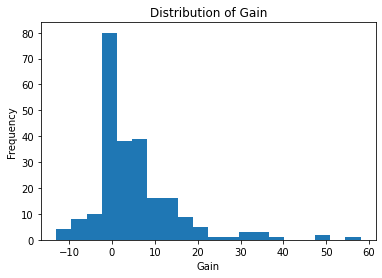

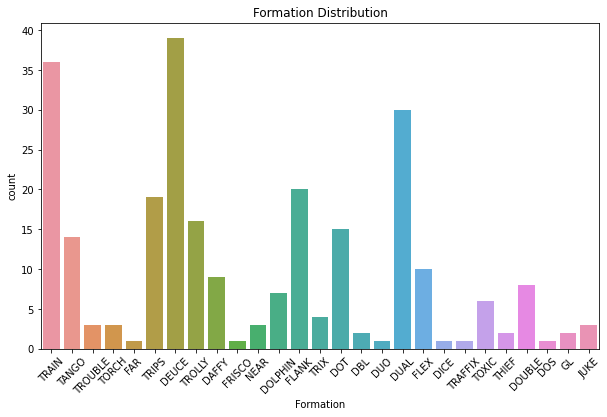

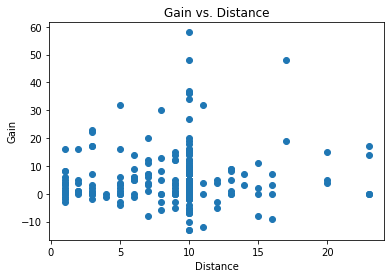

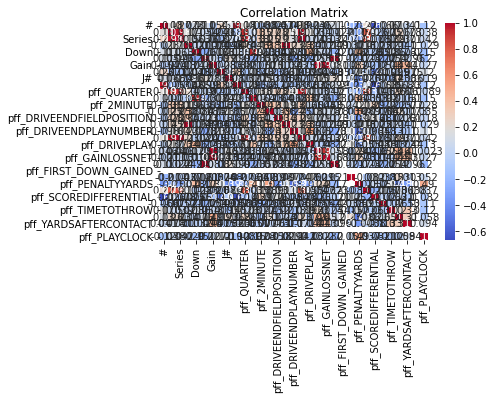

In [17]:
# Histogram of 'Gain'
plt.hist(raw_df['Gain'], bins=20)
plt.xlabel('Gain')
plt.ylabel('Frequency')
plt.title('Distribution of Gain')
plt.show()

# 3. Data Visualization
# Bar chart for 'Formation'
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df, x='Formation')
plt.xticks(rotation=45)
plt.title('Formation Distribution')
plt.show()

# Scatter plot to explore relationships
plt.scatter(raw_df['Distance'], raw_df['Gain'])
plt.xlabel('Distance')
plt.ylabel('Gain')
plt.title('Gain vs. Distance')
plt.show()

# 5. Correlation Analysis
correlation_matrix = raw_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


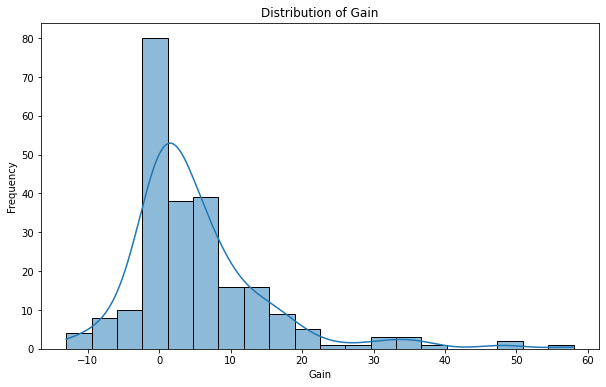

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['Gain'], bins=20, kde=True)
plt.title("Distribution of Gain")
plt.xlabel("Gain")
plt.ylabel("Frequency")
plt.show()

/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


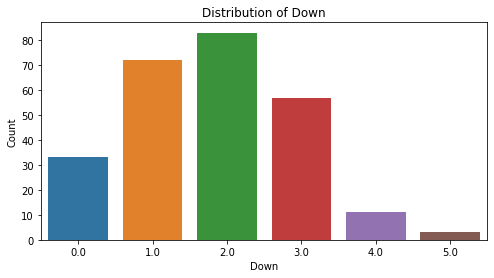

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(raw_df['Down'])
plt.title("Distribution of Down")
plt.xlabel("Down")
plt.ylabel("Count")
plt.show()


In [20]:
raw_df[['Play','gamedate','Gain']]

,Play,gamedate,Gain
0,AKRON EDGE,9/9/2023,4.0
1,S. CINCY EDGE Z-BOSS,9/9/2023,6.0
2,S. PITT COVER Z-CRACK,9/9/2023,9.0
3,BEETLE FOLLOW,9/9/2023,8.0
4,S. GOLFER SAIL,9/9/2023,48.0
...,...,...,...
254,LOAD PIN SPROLES,9/23/2023,23.0
255,JILL PIN BOOT,9/23/2023,0.0
256,SPRINT,9/23/2023,0.0
257,S. CALI RUBY,9/23/2023,0.0


In [21]:
raw_df.gamedate.unique()

array(['9/9/2023', '9/2/2023', '9/16/2023', '9/23/2023'], dtype=object)

/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


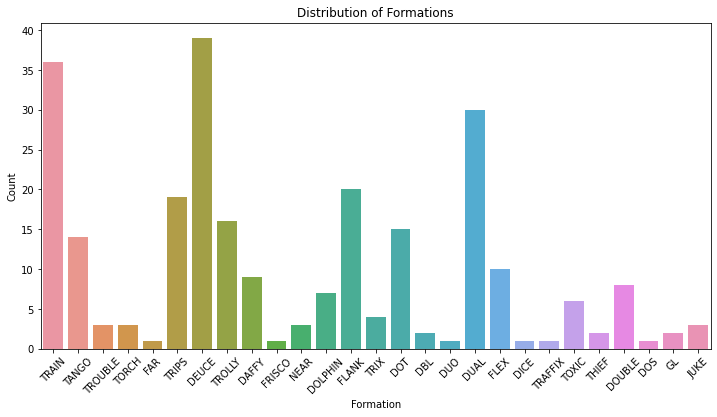

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(raw_df['Formation'])
plt.title("Distribution of Formations")
plt.xlabel("Formation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


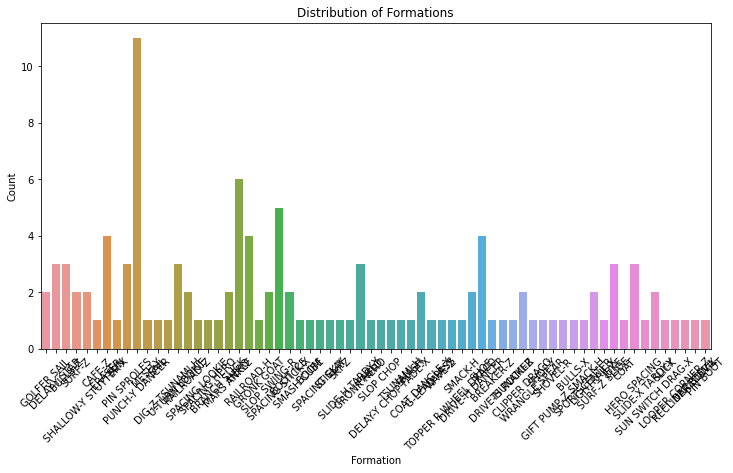

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(raw_df['Pass Concept'])
plt.title("Distribution of Formations")
plt.xlabel("Formation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


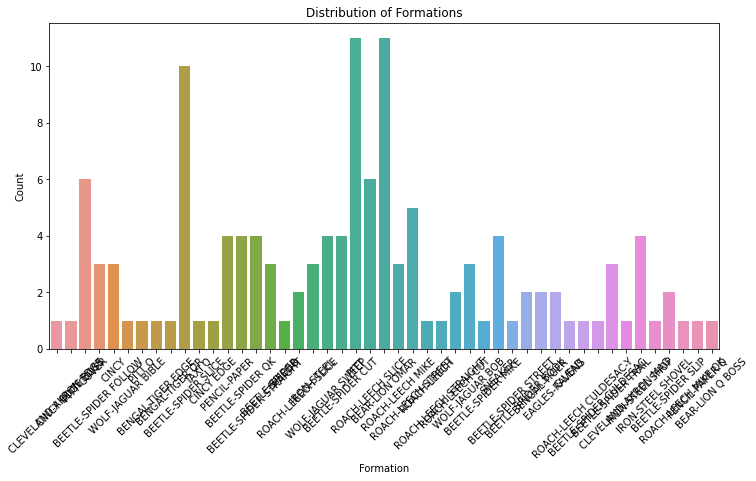

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(raw_df['Run Concept'])
plt.title("Distribution of Formations")
plt.xlabel("Formation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
correlation_matrix = raw_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Game Stats Analysis

What are the key statistics for each game?
How did the team perform in terms of wins and losses?
What was the average gain and yards after catch for each game?

In [ ]:
raw_df['gamedate'] = pd.to_datetime(raw_df['gamedate'], errors='coerce')

# Game Statistics Analysis
game_stats = raw_df.groupby('gamedate').agg({
    'Gain': 'mean',
    'pff_YARDSAFTERCATCH': 'mean',
    'pff_SCOREDIFFERENTIAL': 'last'  # Assuming 'pff_SCOREDIFFERENTIAL' represents the game result.
}).reset_index()

# Plot the average gain and yards after catch for each game.
plt.figure(figsize=(10, 6))
sns.lineplot(data=game_stats, x='gamedate', y='Gain', label='Average Gain')
sns.lineplot(data=game_stats, x='gamedate', y='pff_YARDSAFTERCATCH', label='Average YAC')
plt.xlabel("Game Date")
plt.ylabel("Average Value")
plt.title("Game Statistics Analysis")
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Down and Distance Analysis

How did the team perform on different downs and distances?
What was the success rate on 3rd and short, 3rd and long, etc.?

In [ ]:
# Down and Distance Analysis
down_distance_stats = raw_df.groupby(['Down', 'Distance']).agg({
    'Gain': 'mean',
}).reset_index()

# Plot the average gain for each down and distance combination.
plt.figure(figsize=(10, 6))
sns.heatmap(down_distance_stats.pivot('Down', 'Distance', 'Gain'), annot=True, cmap='coolwarm')
plt.title("Average Gain by Down and Distance")
plt.xlabel("Distance")
plt.ylabel("Down")
plt.show()


### Formation Analysis

What formations are commonly used by the team?
Are certain formations more successful than others in terms of gains?

In [ ]:
# Formation Analysis
formation_counts = raw_df['Formation'].value_counts()
formation_avg_gain = raw_df.groupby('Formation')['Gain'].mean().sort_values()

# Plot the count and average gain for each formation.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=formation_counts, y=formation_counts.index, orient='h')
plt.title("Formation Counts")

plt.subplot(1, 2, 2)
sns.barplot(x=formation_avg_gain, y=formation_avg_gain.index, orient='h')
plt.title("Average Gain by Formation")
plt.tight_layout()
plt.show()


### Pass vs Run Analysis

How often did the team pass vs. run the ball?
What was the success rate for passing and running plays?

In [ ]:
# Pass vs. Run Analysis
run_pass_counts = raw_df['pff_RUNPASS'].value_counts()
run_pass_avg_gain = raw_df.groupby('pff_RUNPASS')['Gain'].mean()

# Plot the count and average gain for pass vs. run plays.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=run_pass_counts, y=run_pass_counts.index, orient='h')
plt.title("Run vs. Pass Counts")

plt.subplot(1, 2, 2)
sns.barplot(x=run_pass_avg_gain, y=run_pass_avg_gain.index, orient='h')
plt.title("Average Gain for Run vs. Pass")
plt.tight_layout()
plt.show()


### Field Position

How does field position impact the team's performance?
Are there any trends in the team's performance based on the field position?

In [ ]:
# Field Position Analysis
field_position_stats = raw_df.groupby('Field Position').agg({
    'Gain': 'mean',
    'pff_SCOREDIFFERENTIAL': 'mean'  # Assuming 'pff_SCOREDIFFERENTIAL' represents the game result.
}).reset_index()

# Plot the average gain and average score differential by field position.
plt.figure(figsize=(12, 6))
sns.barplot(data=field_position_stats, x='Field Position', y='Gain', palette='viridis')
plt.title("Average Gain by Field Position")
plt.xlabel("Field Position")
plt.ylabel("Average Gain")
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.barplot(data=field_position_stats, x='Field Position', y='pff_SCOREDIFFERENTIAL', palette='coolwarm')
plt.title("Average Score Differential by Field Position")
plt.xlabel("Field Position")
plt.ylabel("Average Score Differential")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Time of Play Analysis
quarterly_play_counts = raw_df['pff_QUARTER'].value_counts()
play_time_distribution = raw_df['pff_CLOCK'].value_counts()

# Plot the distribution of plays over quarters and game clock times.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=quarterly_play_counts, y=quarterly_play_counts.index, orient='h')
plt.title("Play Distribution by Quarter")

plt.subplot(1, 2, 2)
sns.histplot(data=play_time_distribution, bins=20, kde=True)
plt.title("Play Time Distribution")
plt.xlabel("Game Clock Time")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder



# Data Preprocessing and Feature Engineering
# Convert 'gamedate' to a datetime object
raw_df['gamedate'] = pd.to_datetime(raw_df['gamedate'], errors='coerce')

# Extract additional date features
raw_df['Year'] = raw_df['gamedate'].dt.year
raw_df['Month'] = raw_df['gamedate'].dt.month
raw_df['Day'] = raw_df['gamedate'].dt.day
raw_df['Weekday'] = raw_df['gamedate'].dt.weekday

# Encode categorical features using Label Encoding
categorical_columns = ['pff_FIELDPOSITION', 'pff_OFFFORMATIONGROUP', 'pff_RBALIGNMENT', 'pff_RBDIRECTION', 'pff_OFFPERSONNELBASIC', 'pff_RBSINBACKFIELD', 'pff_RUNCONCEPTPRIMARY','pff_RUNCONCEPTSECONDARY','pff_SACK','pff_TEALIGNMENT']
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    raw_df[column] = label_encoder.fit_transform(raw_df[column])
    label_encoders[column] = label_encoder

# Define features and target
features = [
    'Year', 'Month', 'Day', 'Weekday', 'pff_FIELDPOSITION', 'Down', 'pff_SCOREDIFFERENTIAL',
    'pff_OFFFORMATIONGROUP', 'pff_RBALIGNMENT', 'pff_RBDIRECTION',
    'pff_OFFPERSONNELBASIC', 'pff_RBSINBACKFIELD', 'pff_RUNCONCEPTPRIMARY',
    'pff_RUNCONCEPTSECONDARY', 'pff_SACK', 'pff_TEALIGNMENT', 'pff_PLAYCLOCK'
]
target = 'Gain'

numeric_features = ['Down', 'pff_SCOREDIFFERENTIAL', 'pff_SACK', 'pff_TEALIGNMENT']
imputer = SimpleImputer(strategy='mean')
raw_df[numeric_features] = imputer.fit_transform(raw_df[numeric_features])

categorical_features = ['pff_OFFFORMATIONGROUP', 'pff_RBALIGNMENT', 'pff_RBDIRECTION', 'pff_OFFPERSONNELBASIC', 'pff_RBSINBACKFIELD', 'pff_RUNCONCEPTPRIMARY', 'pff_RUNCONCEPTSECONDARY', 'pff_PLAYCLOCK']
imputer = SimpleImputer(strategy='most_frequent')
raw_df[categorical_features] = imputer.fit_transform(raw_df[categorical_features])
raw_df.dropna(subset=['Gain'], inplace=True)


# Split the data into training and testing sets
X = raw_df[features]
y = raw_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor (you can experiment with hyperparameters)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Analyze feature importance
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)


In [ ]:
display(y.isna().sum())